In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.utils import resample

import tensorflow as tf


from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, roc_curve, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt

original = pd.read_csv("dados.csv")

In [ ]:
le = preprocessing.LabelEncoder()

modificado = pd.DataFrame()
for x in original:
    if original[x].dtypes==object:
        modificado[x] = le.fit_transform(np.array(original[x]))
    else:
        modificado[x] = np.array(original[x])

clm = list(modificado.columns)
X = np.array(modificado[clm[0:-1]])
y = np.array(modificado[clm[-1]])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

escala = preprocessing.MinMaxScaler(feature_range=(0, 1))

# ############ para rede neural ################
# clfNN = MLPClassifier(hidden_layer_sizes=(3, 10,10,10), alpha=1e-5,verbose=True, learning_rate="adaptive",max_iter=500)
# clas = make_pipeline(escala, clfNN)
# clas.fit(X_train_md,y_train_md)
# ############\################

# ############ para SVC ################
# svc = NuSVC(tol=1e-05,verbose=False,gamma="auto",nu=0.12)
# clas = make_pipeline(escala, svc)
# clas.fit(X_train,y_train)
# ############################

# sc = clas.score(np.array(X_test),np.array(y_test))
# yp = clas.predict(np.array(X_test))
# f1sc = f1_score(yp,np.array(y_test))
# print(f1sc,sc)
# print(confusion_matrix(y_test,yp,normalize='true'))

In [29]:
le = preprocessing.LabelEncoder()

modificado = pd.DataFrame()
for x in original:
    if original[x].dtypes==object:
        modificado[x] = le.fit_transform(np.array(original[x]))
    else:
        modificado[x] = np.array(original[x])

clm = list(modificado.columns)

y = modificado.COMPARECEU_AGENDAMENTO_EXAME
X = modificado.drop('COMPARECEU_AGENDAMENTO_EXAME', axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X = pd.concat([X_train, y_train], axis=1)
NAO = X[X.COMPARECEU_AGENDAMENTO_EXAME==0]
SIM = X[X.COMPARECEU_AGENDAMENTO_EXAME==1]

NAO_upsampled = resample(NAO,
                          replace=True, # sample with replacement
                          n_samples=len(SIM), # match number in majority class
                          random_state=42)

upsampled = pd.concat([SIM, NAO_upsampled])
upsampled.COMPARECEU_AGENDAMENTO_EXAME.value_counts()

y_train = np.array(upsampled.COMPARECEU_AGENDAMENTO_EXAME)
X_train = np.array(upsampled.drop('COMPARECEU_AGENDAMENTO_EXAME', axis=1))


# y_train = np.array(X.COMPARECEU_AGENDAMENTO_EXAME)
# X_train = np.array(X.drop('COMPARECEU_AGENDAMENTO_EXAME', axis=1))


escala = preprocessing.MinMaxScaler(feature_range=(0, 1))

# ############ para rede neural keras ################

escala.fit(X_train)

X_train_md = escala.transform(X_train)
X_test_md = escala.transform(np.array(X_test))

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(len(clm)-1,)),
  tf.keras.layers.Dense(17, activation='elu'),
  tf.keras.layers.Dense(17, activation='elu'),
  tf.keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics= ["accuracy"]
  )

hst = model.fit(X_train_md,y_train, epochs=5000)
model.evaluate(X_test_md,np.array(y_test),verbose=1)
yp = model.predict(X_test_md)
yp = [int(x>0.5) for x in yp]
print(confusion_matrix(np.array(y_test),yp,normalize='true'), f1_score(y_test,yp))

Epoch 1/5000
392/392 [==============================] - 2s 2ms/step - loss: 0.6821 - accuracy: 0.5688
Epoch 2/5000
392/392 [==============================] - 1s 2ms/step - loss: 0.6650 - accuracy: 0.6079
Epoch 3/5000
392/392 [==============================] - 1s 2ms/step - loss: 0.6616 - accuracy: 0.6099
Epoch 4/5000
392/392 [==============================] - 1s 2ms/step - loss: 0.6596 - accuracy: 0.6143
Epoch 5/5000
392/392 [==============================] - 1s 2ms/step - loss: 0.6584 - accuracy: 0.6160
Epoch 6/5000
392/392 [==============================] - 1s 2ms/step - loss: 0.6573 - accuracy: 0.6130
Epoch 7/5000
392/392 [==============================] - 1s 2ms/step - loss: 0.6563 - accuracy: 0.6154
Epoch 8/5000
392/392 [==============================] - 1s 2ms/step - loss: 0.6561 - accuracy: 0.6203
Epoch 9/5000
392/392 [==============================] - 1s 2ms/step - loss: 0.6549 - accuracy: 0.6179
Epoch 10/5000
392/392 [==============================] - 1s 2ms/step - loss: 0.654

array([1, 1, 1, ..., 1, 1, 1])

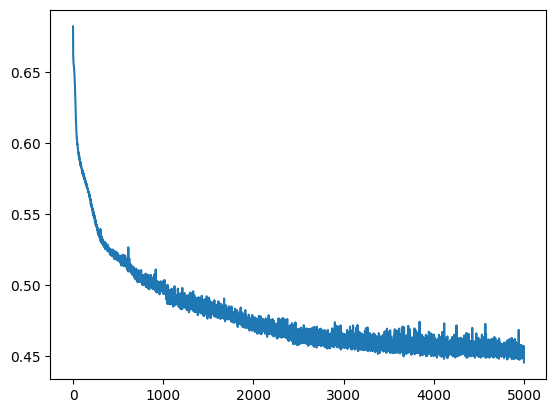

In [30]:
plt.plot(hst.history["loss"])
len(y_test)
np.array(y_test)


In [ ]:
from sklearn.utils import resample

le = preprocessing.LabelEncoder()

modificado = pd.DataFrame()
for x in original:
    if original[x].dtypes==object:
        modificado[x] = le.fit_transform(np.array(original[x]))
    else:
        modificado[x] = np.array(original[x])

y = modificado.COMPARECEU_AGENDAMENTO_EXAME
X = modificado.drop('COMPARECEU_AGENDAMENTO_EXAME', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X = pd.concat([X_train, y_train], axis=1)
NAO = X[X.COMPARECEU_AGENDAMENTO_EXAME==0]
SIM = X[X.COMPARECEU_AGENDAMENTO_EXAME==1]

NAO_upsampled = resample(NAO,
                          replace=True, # sample with replacement
                          n_samples=len(SIM), # match number in majority class
                          random_state=42)

upsampled = pd.concat([SIM, NAO_upsampled])
upsampled.COMPARECEU_AGENDAMENTO_EXAME.value_counts()

y_train_md = np.array(upsampled.COMPARECEU_AGENDAMENTO_EXAME)
X_train_md = np.array(upsampled.drop('COMPARECEU_AGENDAMENTO_EXAME', axis=1))


escala = preprocessing.MinMaxScaler(feature_range=(0, 1))

# ############ para rede neural ################
# clfNN = MLPClassifier(hidden_layer_sizes=(3, 10,10,10), alpha=1e-5,verbose=True, learning_rate="adaptive",max_iter=500)
# clas = make_pipeline(escala, clfNN)
# clas.fit(X_train_md,y_train_md)
# ############\################

############ para SVC ################
svc = NuSVC(tol=1e-05,verbose=False,gamma="scale",nu=0.12)
clas = make_pipeline(escala, svc)
clas.fit(X_train_md,y_train)
############################

sc = clas.score(np.array(X_test),np.array(y_test))
yp = clas.predict(np.array(X_test))
f1sc = f1_score(yp,np.array(y_test))
print(f1sc,sc)
print(confusion_matrix(y_test,yp,normalize='true'))

In [ ]:
le = preprocessing.LabelEncoder()

modificado = pd.DataFrame()
for x in original:
    if original[x].dtypes==object:
        modificado[x] = le.fit_transform(np.array(original[x]))
    else:
        modificado[x] = np.array(original[x])

y = modificado.COMPARECEU_AGENDAMENTO_EXAME
X = modificado.drop('COMPARECEU_AGENDAMENTO_EXAME', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X = pd.concat([X_train, y_train], axis=1)
NAO = X[X.COMPARECEU_AGENDAMENTO_EXAME==0]
SIM = X[X.COMPARECEU_AGENDAMENTO_EXAME==1]

SIM_downsampled = resample(SIM,
                          replace=True, # sample with replacement
                          n_samples=len(NAO), # match number in majority class
                          random_state=42)

downsampled = pd.concat([SIM_downsampled, NAO])
downsampled.COMPARECEU_AGENDAMENTO_EXAME.value_counts()

y_train_md = np.array(downsampled.COMPARECEU_AGENDAMENTO_EXAME)
X_train_md = np.array(downsampled.drop('COMPARECEU_AGENDAMENTO_EXAME', axis=1))


escala = preprocessing.MinMaxScaler(feature_range=(0, 1))

# ############ para rede neural ################
# clfNN = MLPClassifier(hidden_layer_sizes=(3, 10,10,10), alpha=1e-5,verbose=True, learning_rate="adaptive",max_iter=500)
# clas = make_pipeline(escala, clfNN)
# clas.fit(X_train_md,y_train_md)
# ############\################

############ para SVC ################
svc = NuSVC(tol=1e-05,verbose=False,gamma="scale")
clas = make_pipeline(escala, svc)
clas.fit(X_train_md,y_train_md)
############################

sc = clas.score(np.array(X_test),np.array(y_test))
yp = clas.predict(np.array(X_test))
f1sc = f1_score(yp,np.array(y_test))
print(f1sc,sc)
print(confusion_matrix(y_test,yp,normalize='true'))